---
title: "Feature Extraction"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-22"
categories: [python, datacamp, feature engineering, machine learning, dimension reduction, PCA]
image: "featureExtraction.png"

---

# Feature Extraction

Principal Component Analysis (PCA), the most widely used dimensionality reduction algorithm, is covered briefly here. We will learn how and why this algorithm is so powerful, as well as how to apply it for data exploration and preprocessing as part of a modeling pipeline. We will conclude with an example of image compression.

This **Feature Extraction** is part of [Datacamp course: Dimensionality Reduction in Python](https://app.datacamp.com/learn/courses/dimensionality-reduction-in-python)

This is my learning experience of data science through DataCamp

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 8)

## Feature extraction
![feature](feature.png)

### Manual feature extraction I
You want to compare prices for specific products between stores. The features in the pre-loaded dataset `sales_df` are: `storeID`, `product`, `quantity` and `revenue`. The `quantity` and `revenue` features tell you how many items of a particular product were sold in a store and what the total revenue was. For the purpose of your analysis it's more interesting to know the average price per product.

In [85]:
sales_df = pd.read_csv('dataset/grocery_sales.csv')
sales_df.head()

,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5
3,B,Apples,1785,9181.0
4,B,Bananas,944,3680.2


In [86]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['revenue', 'quantity'], axis=1)

reduced_df.head()

,storeID,product,price
0,A,Apples,5.135616
1,A,Bananas,3.365105
2,A,Oranges,5.317020
3,B,Apples,5.143417
4,B,Bananas,3.898517


### Manual feature extraction II
You're working on a variant of the ANSUR dataset, `height_df`, where a person's height was measured 3 times. Add a feature with the mean height to the dataset, then drop the 3 original features.

In [87]:
height_df = pd.read_csv('dataset/height_df.csv')
height_df.head()

,weight_kg,height_1,height_2,height_3
0,81.5,1.78,1.80,1.80
1,72.6,1.70,1.70,1.69
2,92.9,1.74,1.75,1.73
3,79.4,1.66,1.68,1.67
4,94.6,1.91,1.93,1.90


In [88]:
# Calculate the mean height
height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)

# Drop the 3 original height features
reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)

reduced_df.head()

,weight_kg,height
0,81.5,1.793333
1,72.6,1.696667
2,92.9,1.740000
3,79.4,1.670000
4,94.6,1.913333


## Principal component analysis
- PCA concept
![pca](pca.png)

### Calculating Principal Components
You'll visually inspect a 4 feature sample of the ANSUR dataset before and after PCA using Seaborn's `pairplot()`. This will allow you to inspect the pairwise correlations between the features.

In [89]:
ansur_df = pd.read_csv('dataset/ansur_sample.csv')

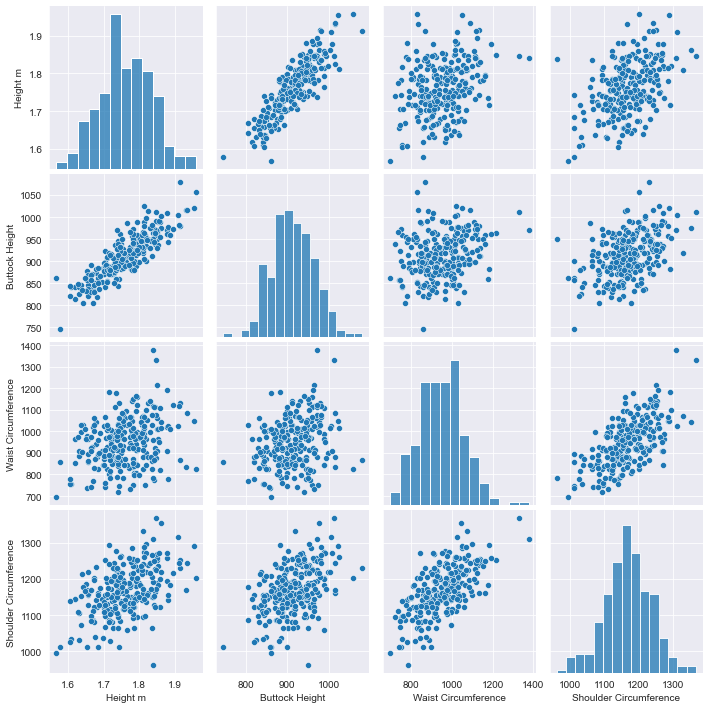

In [90]:
# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_df);


Notice how, in contrast to the input features, none of the principal components are correlated to one another.


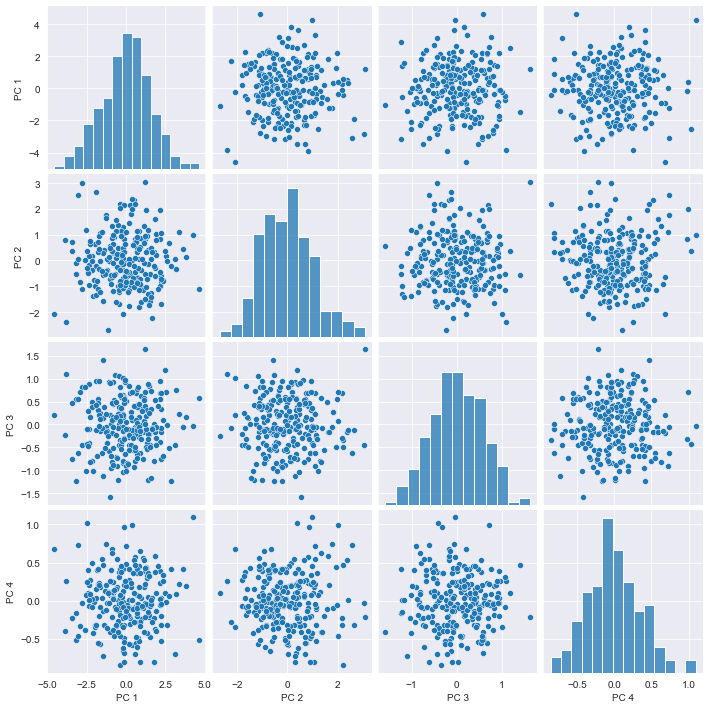

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)

# This changes the numpy array output back to a dataframe
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the pricipal component dataframe
sns.pairplot(pc_df);
print("\nNotice how, in contrast to the input features, none of the principal components are correlated to one another.")

### PCA on a larger dataset
You'll now apply PCA on a somewhat larger ANSUR datasample with 13 dimensions. The fitted model will be used in the next exercise. Since we are not using the principal components themselves there is no need to transform the data, instead, it is sufficient to fit pca to the data.

In [92]:
df = pd.read_csv('./dataset/ANSUR_II_MALE.csv')
ansur_df = df[['stature_m', 'buttockheight', 'waistdepth', 'span',
               'waistcircumference', 'shouldercircumference', 'footlength',
               'handlength', 'functionalleglength', 'chestheight',
               'chestcircumference', 'cervicaleheight', 'sittingheight']]

In [93]:
# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)


PCA()

You've fitted PCA on our 13 feature datasample. Now let's see how the components explain the variance

### PCA explained variance
You'll be inspecting the variance explained by the different principal components of the `pca` instance you created in the previous exercise.

In [94]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

[0.57832831 0.2230137  0.06404218 0.04252456 0.0278581  0.01761021
 0.01681037 0.01014147 0.00706488 0.00607973 0.00344643 0.00228095
 0.00079911]


In [95]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.57832831 0.801342   0.86538419 0.90790875 0.93576684 0.95337706
 0.97018743 0.9803289  0.98739378 0.99347351 0.99691994 0.99920089
 1.        ]


Based on the data, we can use 4 principal components if we don't want to lose more than 10% of explained variance during dimensionality reduction.
Using just 4 principal components we can explain more than 90% of the variance in the 13 feature dataset.

## PCA applications


### Understanding the components
You'll apply PCA to the numeric features of the Pokemon dataset, `poke_df`, using a pipeline to combine the feature scaling and PCA in one go. You'll then interpret the meanings of the first two components.



In [96]:
df = pd.read_csv('dataset/pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [97]:
poke_df = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
poke_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


In [98]:
from sklearn.pipeline import Pipeline

# Build the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=2))
])

# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}


In PC1, All features have a similar positive effect. PC 1 can be interpreted as a measure of overall quality (high stats). In contrast, PC2's defense has a strong positive effect on the second component and speed a strong negative one. This component quantifies an agility vs. armor & protection trade-off.

### PCA for feature exploration
You'll use the PCA pipeline you've built in the previous exercise to visually explore how some categorical features relate to the variance in poke_df.  These categorical features (`Type` & `Legendary`) can be found in a separate dataframe poke_cat_df.

In [99]:
poke_cat_df = df[['Type 1', 'Legendary']]

In [100]:
# Build the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=2))
])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

print(pc)

[[-1.5563747  -0.02148212]
 [-0.36286656 -0.05026854]
 [ 1.28015158 -0.06272022]
 ...
 [ 2.45821626 -0.51588158]
 [ 3.5303971  -0.95106516]
 [ 2.23378629  0.53762985]]


In [101]:
# Add the 2 components to poke_cat_df
poke_cat_df.loc[:, 'PC 1'] = pc[:, 0]
poke_cat_df.loc[:, 'PC 2'] = pc[:, 1]

poke_cat_df.head()

C:\Users\dghr201\AppData\Local\Temp\ipykernel_21512\3952925675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poke_cat_df.loc[:, 'PC 1'] = pc[:, 0]
C:\Users\dghr201\AppData\Local\Temp\ipykernel_21512\3952925675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poke_cat_df.loc[:, 'PC 2'] = pc[:, 1]


,Type 1,Legendary,PC 1,PC 2
0,Grass,False,-1.556375,-0.021482
1,Grass,False,-0.362867,-0.050269
2,Grass,False,1.280152,-0.062720
3,Grass,False,2.620916,0.704263
4,Fire,False,-1.758284,-0.706179


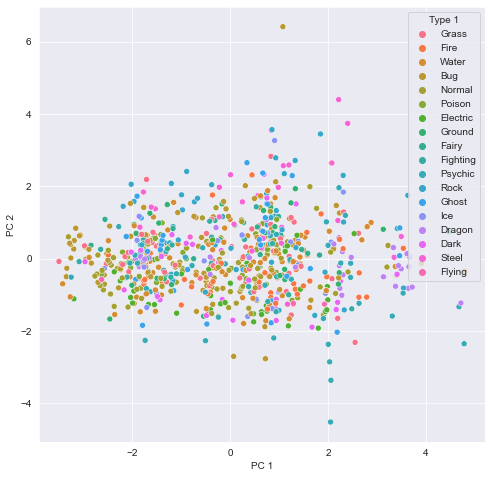

In [102]:
# Use the Type feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, x='PC 1', y='PC 2', hue='Type 1');

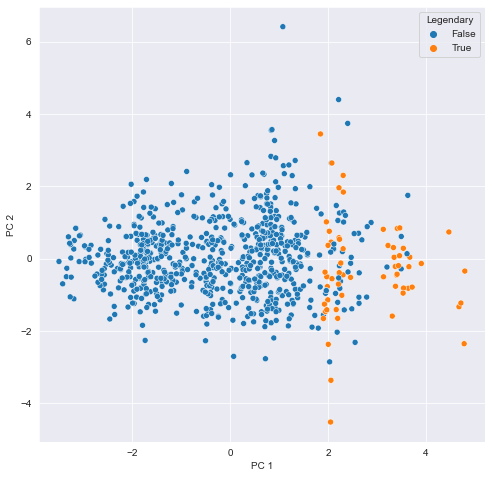

In [103]:
# Use the Legendary feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, x='PC 1', y='PC 2', hue='Legendary');

Looks like the different types are scattered all over the place while the legendary Pokemon always score high for PC 1 meaning they have high stats overall. Their spread along the PC 2 axis tells us they aren't consistently fast and vulnerable or slow and armored.

### PCA in a model pipeline
We just saw that legendary Pokemon tend to have higher stats overall. Let's see if we can add a classifier to our pipeline that detects legendary versus non-legendary Pokemon based on the principal components.

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = poke_df
y = df['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [105]:
# Build the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=2)),
    ('classifier', RandomForestClassifier(random_state=0))
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_)

# Score the acuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print('{0:.1%} test set accuracy'.format(accuracy))

[0.45673596 0.18599109]
92.1% test set accuracy


Repeat the process with 3 extracted components.

In [106]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.45673596 0.18599109 0.12852181]
93.8% test set accuracy


In [107]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=4)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.45673596 0.18599109 0.12852181 0.11442161]
95.0% test set accuracy


## Principal Component Selection
- PCA operations
![pca](pca_op.png)

### Selecting the proportion of variance to keep
You'll let PCA determine the number of components to calculate based on an explained variance threshold that you decide.

In [108]:
ansur_df = pd.read_csv('dataset/ANSUR_II_FEMALE.csv')
ansur_df.head()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Support,Regular Army,Female,231,1282,301,204,1180,222,177,...,217,345,942,152,756,65.7,1.560,26.997041,Overweight,Normal
1,Combat Service Support,Regular Army,Female,194,1379,320,207,1292,225,178,...,168,329,1032,155,815,53.4,1.665,19.262506,Normal,Normal
2,Combat Service Support,Regular Army,Female,183,1369,329,233,1271,237,196,...,159,367,1035,162,799,66.3,1.711,22.647148,Normal,Tall
3,Combat Service Support,Regular Army,Female,261,1356,306,214,1250,240,188,...,235,371,999,173,818,78.2,1.660,28.378575,Overweight,Normal
4,Combat Arms,Regular Army,Female,309,1303,308,214,1210,217,182,...,300,380,911,152,762,88.6,1.572,35.853259,Overweight,Normal


In [109]:
ansur_df.drop(['Gender', 'Branch', 'Component', 'BMI_class', 'Height_class'],
              axis=1, inplace=True)
ansur_df.shape

(1986, 94)

In [110]:
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=0.8))
])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

11 components selected


In [111]:
# Pipe a scaler to PCA selecting 90% of the variance
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=0.9))
])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

23 components selected


From the result, we need more than 12 components to go from 80% to 90% explained variance.

### Choosing the number of components
You'll now make a more informed decision on the number of principal components to reduce your data to using the "elbow in the plot" technique.

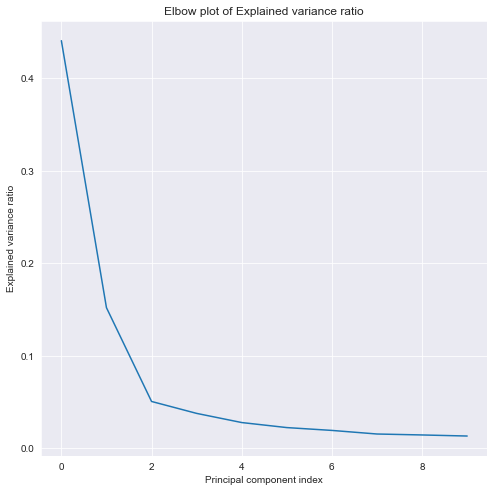

In [112]:
# Pipeline a scaler and PCA selecting 10 components
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=10))
])

# Fit the pipe to the data
pipe.fit(ansur_df)

# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_);
plt.xlabel('Principal component index');
plt.ylabel('Explained variance ratio');
plt.title('Elbow plot of Explained variance ratio');
plt.grid(True);

### PCA for image compression
You'll reduce the size of 16 images with hand written digits (MNIST dataset) using PCA.

The samples are 28 by 28 pixel gray scale images that have been flattened to arrays with 784 elements each (28 x 28 = 784) and added to the 2D numpy array `X_test`. Each of the 784 pixels has a value between 0 and 255 and can be regarded as a feature.

A pipeline with a scaler and PCA model to select 78 components has been pre-loaded for you as `pipe`. This pipeline has already been fitted to the entire MNIST dataset except for the 16 samples in X_test.

In [113]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 4, figsize=(6, 6),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.05, wspace=0.05))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary',
                  clim=(0, 300))

In [114]:
from sklearn.datasets import fetch_openml

X, y = X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_sample = X_test[:1600:100]

In [115]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=78))
])

pipe.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('reducer', PCA(n_components=78))])

In [116]:
X_sample.shape

(16, 784)

KeyError: 0

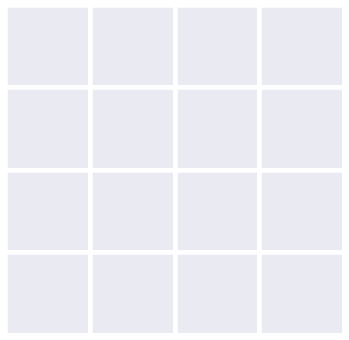

In [117]:
# Plot the MNIST sample data
plot_digits(X_sample)

In [118]:
# Transform the input data to principal components
pc = pipe.transform(X_sample)

# Prints the number of features per dataset
print("X_test has {} features".format(X_sample.shape[1]))
print("pc has {} features".format(pc.shape[1]))

X_test has 784 features
pc has 78 features


In [119]:
# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Prints the number of features
print("X_rebuilt has {} features".format(X_rebuilt.shape[1]))

X_rebuilt has 784 features


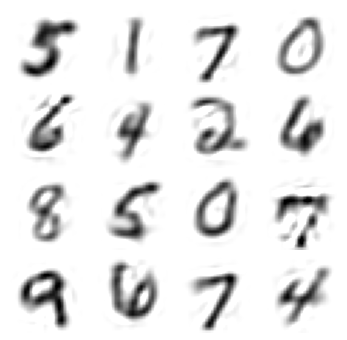

In [120]:
# Plot the reconstructed data
plot_digits(X_rebuilt)

You've reduced the size of the data 10 fold but were able to reconstruct images with reasonable quality.